<a href="https://colab.research.google.com/github/pradiptars/ML_Price_Prediction_cleandata_save/blob/main/bangalorehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banglore.csv to banglore.csv


In [ ]:
df_raw = pd.read_csv('banglore.csv')

In [ ]:
df_raw.shape

(13320, 9)

In [ ]:
df_raw.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:

df = df_raw.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


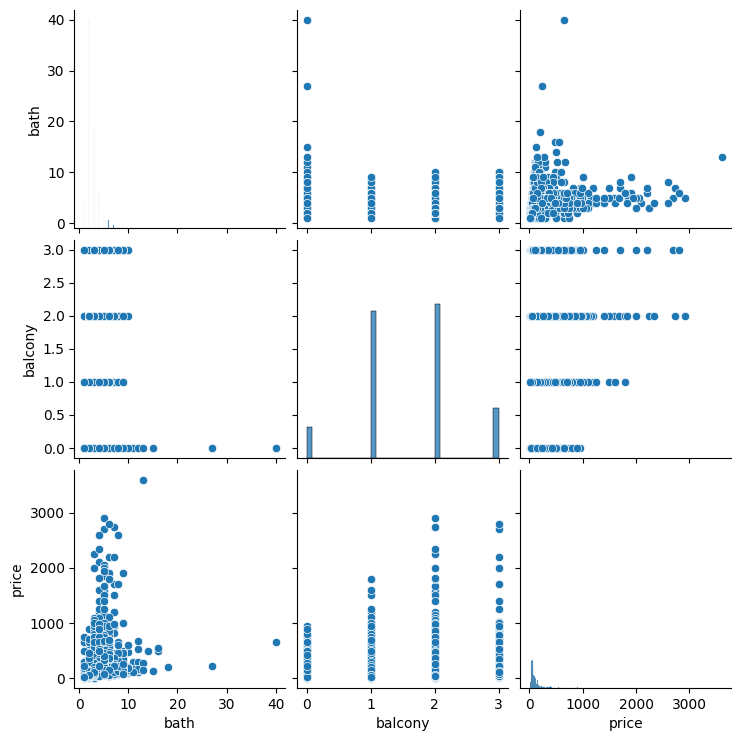

In [ ]:
sns.pairplot(df)

In [ ]:

def value_counts(df):
  for var in df.columns:
    print(var)
    print(df[var].value_counts())
    print()

In [ ]:
value_counts(df)

area_type
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

availability
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

location
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

size
size
2 BHK         5199
3 BHK        

In [ ]:
num_var = df.select_dtypes(include='number').columns
num_var

Index(['bath', 'balcony', 'price'], dtype='object')

<Axes: >

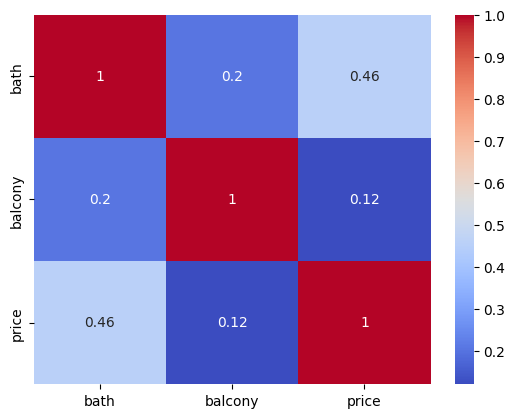

In [ ]:
sns.heatmap(df[num_var].corr(), cmap='coolwarm', annot=True)

In [ ]:


df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


<Axes: >

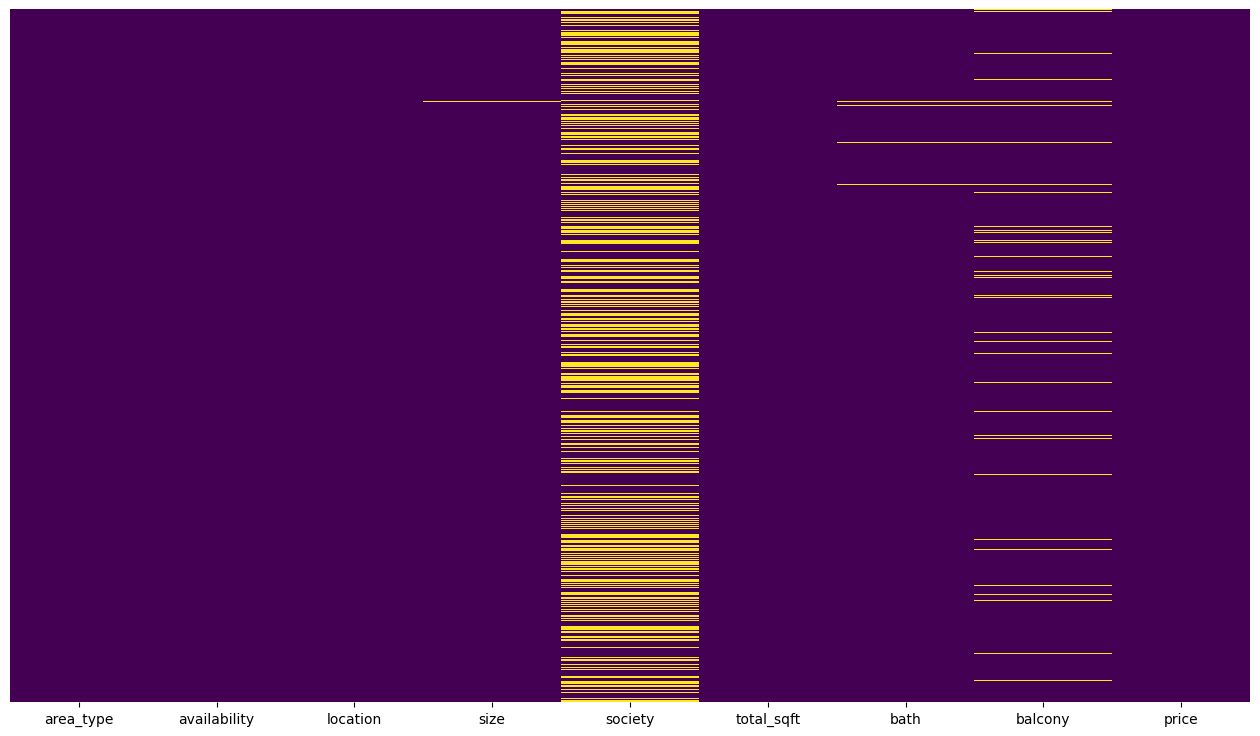

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df2 = df.drop(['society'], axis=1)

In [ ]:
df2.shape

(13320, 8)

In [ ]:
df2['balcony'] = df['balcony'].fillna(df['balcony'].mean())
df2.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


In [ ]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [ ]:
df3.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df3.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [ ]:
df3['total_sqft'].value_counts()

,count
total_sqft,
1200,843
1100,221
1500,204
2400,195
600,180
1000,172
1350,132
1050,123
1300,117


# converting catagorical value to numaric

In [ ]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(int(str_val))
  except:
    try:
      val = str_val.split('-')
      total_sqft_int.append((float(val[0])+float(val[1]))/2)
    except:
      total_sqft_int.append(np.nan)

In [ ]:
df4 = df3.reset_index(drop=True)

In [ ]:
df5 = df4.join(pd.DataFrame(total_sqft_int, columns=['total_sqft_int']))

In [ ]:
df5.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0


In [ ]:
df5.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
total_sqft_int,133


In [ ]:
df6 = df5.dropna()
df6.shape

(13113, 9)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13113 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13113 non-null  object 
 1   availability    13113 non-null  object 
 2   location        13113 non-null  object 
 3   size            13113 non-null  object 
 4   total_sqft      13113 non-null  object 
 5   bath            13113 non-null  float64
 6   balcony         13113 non-null  float64
 7   price           13113 non-null  float64
 8   total_sqft_int  13113 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


# size variable converting numaric

In [ ]:
df6['size'].value_counts()

,count
size,
2 BHK,5170
3 BHK,4228
4 Bedroom,815
4 BHK,566
3 Bedroom,540
1 BHK,526
2 Bedroom,324
5 Bedroom,292
6 Bedroom,189


In [ ]:
size_int = []
for str_val in df6['size']:
  val = str_val.split(" ")
  try:
    size_int.append(int(val[0]))
  except:
    size_int.append(np.nan)
    print('notice =', str_val)

In [ ]:
df6.reset_index(drop=True, inplace=True)

In [ ]:
df7 = df6.join(pd.DataFrame(size_int, columns=['bhk']))

In [ ]:
df7.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [ ]:
df7.tail(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13108,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13109,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13110,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13111,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13112,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


In [ ]:
df7.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
total_sqft_int,0
bhk,0


In [ ]:
from scipy import stats


In [ ]:
def diagonstic_plot(df, variable):
  plt.figure(figsize=(16,4))
  plt.subplot(1,3,1)
  sns.distplot(df[variable], bins=30)
  plt.title("Histogram")

  plt.subplot(1,3,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.title("Q-Q Plot")

  plt.subplot(1,3,3)
  sns.boxplot(df[variable])
  plt.title("Box Plot")

  plt.subplot(1,3,3)
  sns.boxplot(df[variable])
  plt.title("Box Plot")

  plt.show()

In [ ]:
num_var = df7.select_dtypes(include='number').columns
num_var

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk'], dtype='object')

**********{}********* bath


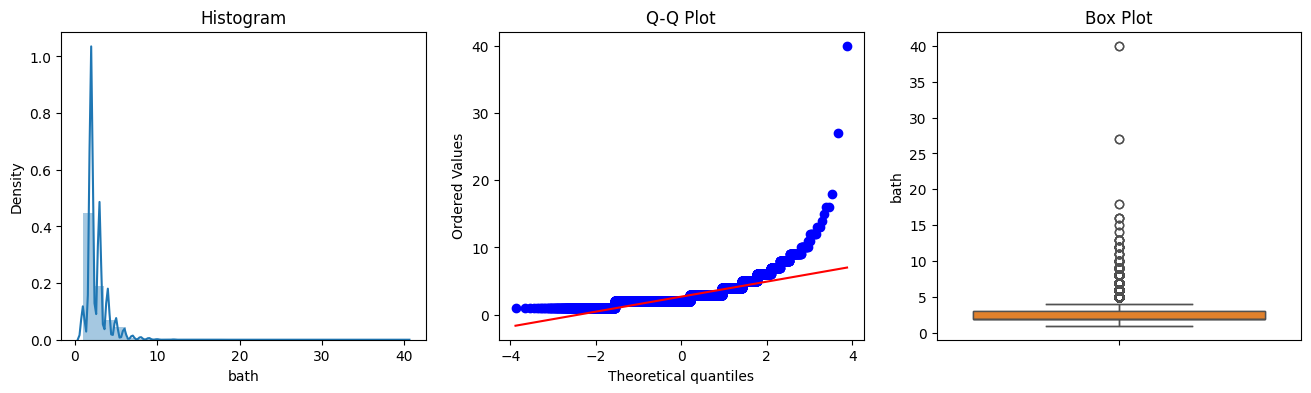

**********{}********* balcony


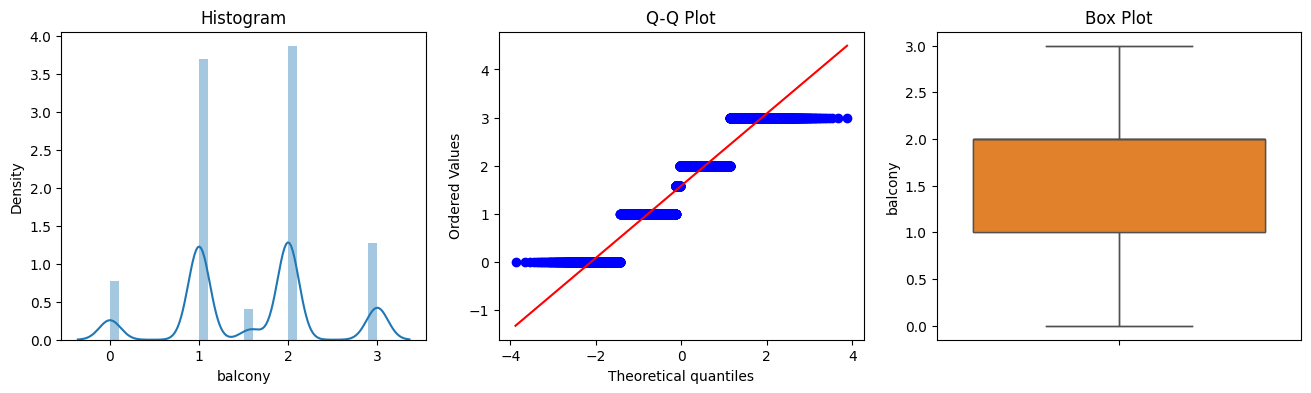

**********{}********* price


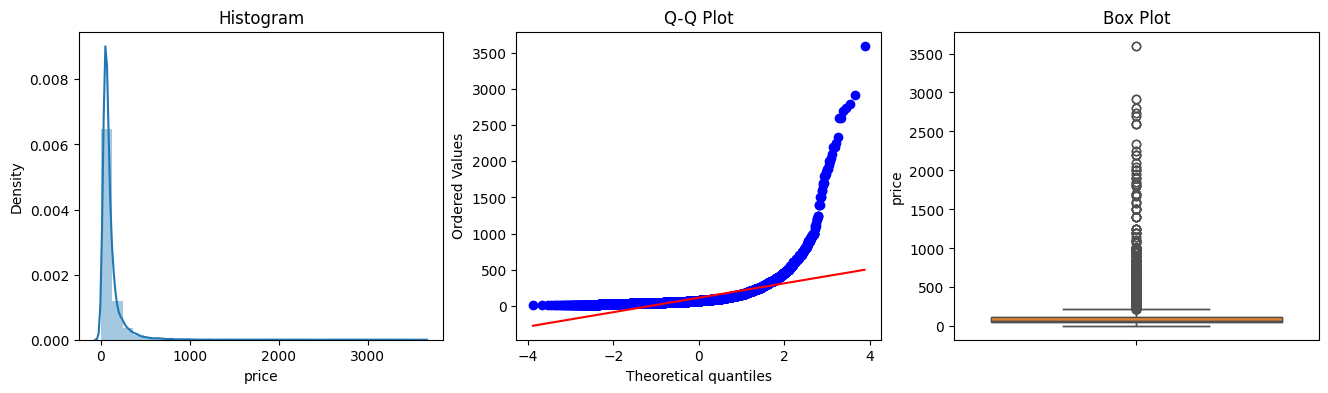

**********{}********* total_sqft_int


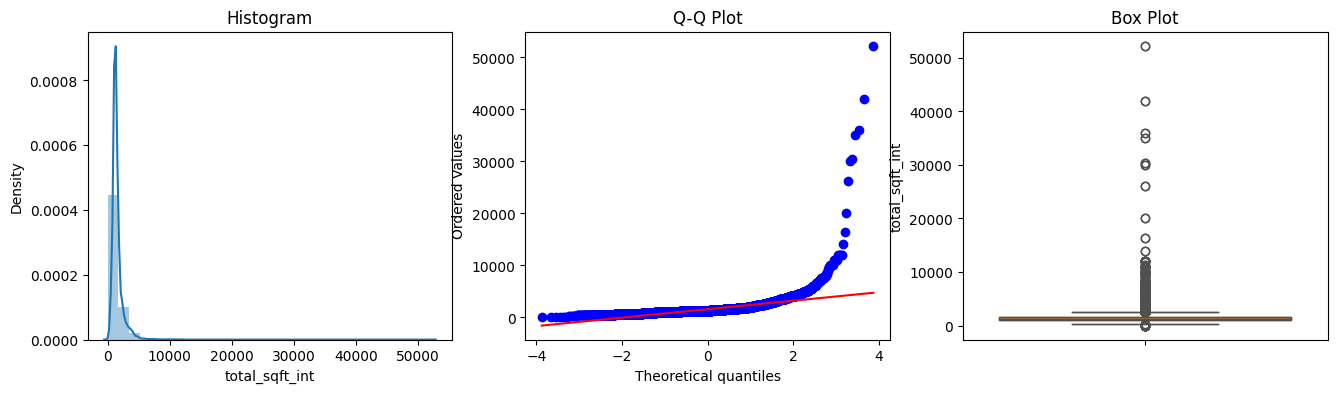

**********{}********* bhk


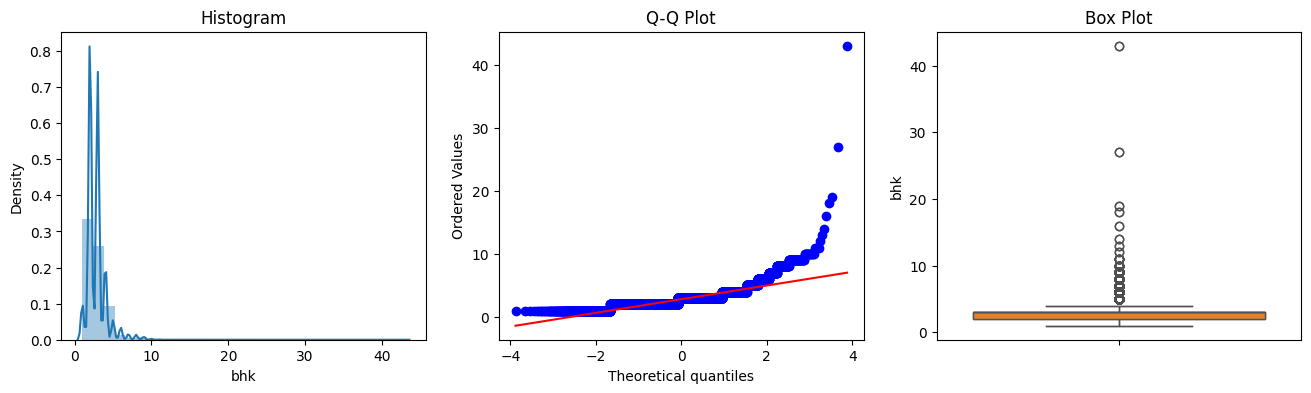

In [ ]:
for var in num_var:
  print("**********{}*********", format(var))
  diagonstic_plot(df7, var)

In [ ]:
df8 = df7[df7['total_sqft_int']/df7['bhk']<350]

In [ ]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
44,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
56,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [ ]:
df8["Price_per_sqft"] = df8["price"]*100000/df8["total_sqft_int"]
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6,36274.509804
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2,3500.000000
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3,4585.365854
44,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8,33333.333333
56,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6,10660.980810


In [ ]:
df8.Price_per_sqft.describe()

,Price_per_sqft
count,1.094000e+03
mean,2.713425e+04
std,3.700964e+05
min,1.640625e+03
25%,8.309748e+03
50%,1.173333e+04
75%,1.583333e+04
max,1.200000e+07


In [ ]:
df8.bath.unique()

array([ 6.,  1.,  2.,  9.,  4.,  7.,  3.,  5.,  8., 11., 10., 27., 12.,
       16., 40., 15., 13., 18.])

In [ ]:
df8[df8.bath > df8.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft
1915,Plot Area,Ready To Move,KR Puram,8 Bedroom,1200,12.0,1.584376,110.0,1200.0,8,9166.666667
1940,Plot Area,Ready To Move,Hongasandra,8 Bedroom,990,12.0,0.000000,120.0,990.0,8,12121.212121
6820,Plot Area,Ready To Move,5th Block Hbr Layout,9 Bedroom,2600,12.0,1.584376,675.0,2600.0,9,25961.538462
7966,Plot Area,Ready To Move,Wilson Garden,8 Bedroom,1850,12.0,1.584376,300.0,1850.0,8,16216.216216
9829,Plot Area,Ready To Move,Doddakannelli,6 Bedroom,1200,9.0,3.000000,122.0,1200.0,6,10166.666667
10524,Plot Area,18-Feb,Electronic City,9 Bedroom,1200,13.0,1.584376,150.0,1200.0,9,12500.000000
11456,Plot Area,Ready To Move,Chamrajpet,6 Bedroom,1500,9.0,3.000000,230.0,1500.0,6,15333.333333


In [ ]:
df9 = df8[df8.bath < df8.bhk+2]

In [ ]:
df9.shape

(1067, 11)

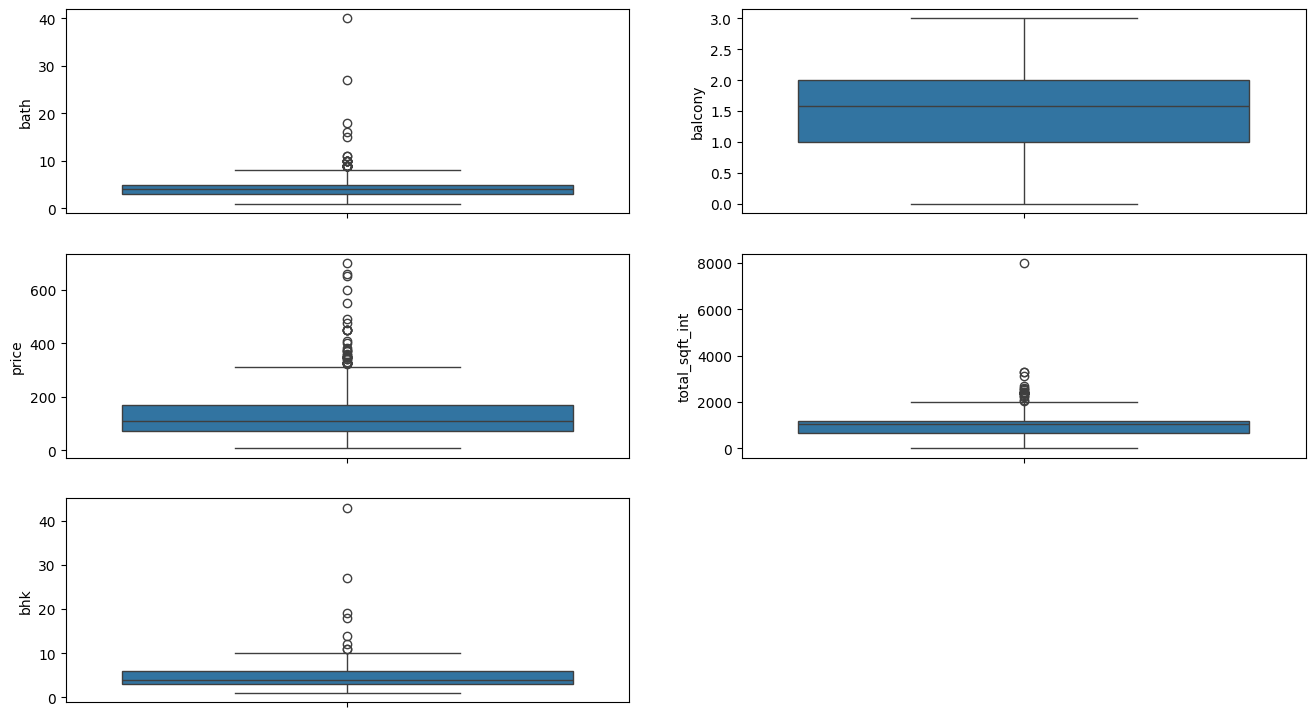

In [ ]:
plt.figure(figsize=(16,9))
for i, var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(df9[var])

In [ ]:
df9.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6,36274.509804
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2,3500.000000


In [ ]:
df9.select_dtypes(include='object').columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [ ]:
df10 = df9.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis=1)
df10.head()

,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft
9,6.0,1.584376,370.0,1020.0,6,36274.509804
26,1.0,1.000000,23.1,660.0,2,3500.000000
29,2.0,1.000000,47.0,1025.0,3,4585.365854
44,9.0,1.584376,200.0,600.0,8,33333.333333
56,4.0,1.000000,150.0,1407.0,6,10660.980810


In [ ]:
df10.to_csv('banglore_clean.csv', index=False)

In [ ]:
df11 = df9.drop(['size', 'total_sqft'], axis=1)
df11.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6,36274.509804
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2,3500.000000
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3,4585.365854
44,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8,33333.333333
56,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6,10660.980810


In [ ]:
df12 = pd.get_dummies(df11, drop_first=True, columns=['area_type', 'availability', 'location'], dtype='int64')
df12.head()

,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_17-Aug,availability_17-Dec,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Mar,availability_18-May,availability_19-Aug,availability_19-Dec,availability_19-Mar,availability_19-Nov,availability_19-Oct,availability_Ready To Move,location_ ittamadu,location_1 Annasandrapalya,location_1 Ramamurthy Nagar,location_1Channasandra,location_1Hanuman Nagar,location_1Kasavanhalli,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Radha Krishna Layout,location_2Electronic City Phase II,location_2nd Block Hbr Layout,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_4th Block HBR Layout,location_4th Block Jayanagar,location_5th Block Hbr Layout,location_5th Block Jayanagar,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Koramangala,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS LAYOUT A-BLOCK Singasandra,location_AMS Layout,location_Abbigere,location_Achins Road,location_Adityanagar,location_Akshaya Nagar,location_Akshaya Vana,location_Allalasandra,location_Amruthahalli,location_Anand Nagar,location_Anandapura,location_Ananth Nagar,"location_Ananthapura, T C palaya Main Road",location_Andrahalli,location_Anekal,location_Anjana Nagar,location_Anjappa Layout,"location_Annapoorneshwari Layout, JP nagar 7th phase",location_Annapurneshwari Nagar,location_Arasanakunte,location_Arekere,location_Arishinakunte,location_Ashwathnagar,location_Attibele,location_Attiguppe,location_Attur Layout,location_B Channasandra,location_B Y Raveshwara Nagar,location_BCC Layout,location_BEML Layout,location_BEML Layout 5th Stage,location_BHEL Layout,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM Layout,location_BTM Layout 1stage 9th Main,location_Babusapalaya,location_Bagalakunte,location_Bahubali Nagar,location_Balepet,location_Banagiri Nagar,location_Banashankari,location_Banashankari 2 nd Stage,location_Banashankari 2nd Stage,"location_Banashankari 6th stage , 2nd block",location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bank Of Baroda Colony,location_Bannerghatta,location_Bannerghatta Road,location_Bapuji Layout,location_Bapuji Nagar,location_Basavanapura,location_Basavangudi,location_Basaveshwara Nagar,location_Basaveshwara Nagar Yelahanka,"location_Basnashankari,6th stage,",location_Basvasamithi Layout Vidyaranyapura,location_Battarahalli,location_Begur Road,location_Behind Don Bosco Church,location_Belathur,location_Bellandur,"location_Beml layout, Rajarajeshwari nagar",location_Bettadasanapura,location_Bhuvaneshwari Nagar,location_Bilal Nagar,location_Billekahalli,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommenahalli,location_Brookefield,location_Budigere,location_Byagadadhenahalli,location_Byrathi Village,location_CV Raman Nagar,location_Cambridge road,location_Canara Bank Layout,location_Chamrajpet,location_Chandapura,location_Chandra Layout,location_Chelekare,location_Chikka Gowdanapalya.,location_Chikkabanavar,location_Chikkabettahalli,location_Chikkalasandra,location_Chikkasandra,location_Chikkathoguru,location_Cholanayakanahalli,location_Choodasandra,location_Classic Paradise Layout,location_Coconut Garden,location_Cottonpet,location_D Group Employees Layout,location_Dasanapura,location_Dasappa Layout,l

In [ ]:
df12.to_csv('oh_data_clean.csv', index=False)

In [ ]:
df11['area_type'].value_counts()

,count
area_type,
Plot Area,821
Built-up Area,127
Super built-up Area,111
Carpet Area,8


In [ ]:
df13 = df11.copy()

In [ ]:
for cat_var in ['Super built-up Area', 'Built-up Area', 'Plot Area']:
  df13["area_type"+cat_var] = np.where(df13['area_type']==cat_var, 1, 0)
  df13.shape

In [ ]:
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6,36274.509804,0,0,0
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2,3500.000000,0,0,0
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3,4585.365854,0,0,0
44,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8,33333.333333,0,0,0
56,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6,10660.980810,0,0,0


In [ ]:
df13["availability"].value_counts()

,count
availability,
Ready To Move,1004
18-Apr,13
18-May,10
18-Mar,6
18-Dec,5
18-Feb,5
19-Dec,5
17-Dec,4
18-Aug,3


In [ ]:
df13["Ready To Move"] = np.where(df13['availability']=="Ready To Move", 1, 0)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,Ready To Move
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,1020.0,6,36274.509804,0,0,0,1
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,660.0,2,3500.000000,0,0,0,1
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,1025.0,3,4585.365854,0,0,0,1
44,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,600.0,8,33333.333333,0,0,0,1
56,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,1407.0,6,10660.980810,0,0,0,1


In [67]:
location_val = df13["location"].value_counts()
location_val

,count
location,
Electronic City,19
Nagarbhavi,19
2nd Stage Nagarbhavi,17
Vidyaranyapura,16
Ramamurthy Nagar,14
Kumaraswami Layout,12
KR Puram,11
8th Phase JP Nagar,10
9th Phase JP Nagar,10


In [68]:
location_grt_20 = location_val[location_val>=20].index
location_grt_20

Index([], dtype='object', name='location')

In [69]:
df14 = df13.drop(['area_type', 'availability', 'location'], axis=1)
df14.head()

,bath,balcony,price,total_sqft_int,bhk,Price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,Ready To Move
9,6.0,1.584376,370.0,1020.0,6,36274.509804,0,0,0,1
26,1.0,1.000000,23.1,660.0,2,3500.000000,0,0,0,1
29,2.0,1.000000,47.0,1025.0,3,4585.365854,0,0,0,1
44,9.0,1.584376,200.0,600.0,8,33333.333333,0,0,0,1
56,4.0,1.000000,150.0,1407.0,6,10660.980810,0,0,0,1


In [70]:
df14.to_csv('cat_clean.csv', index=False)